<a href="https://colab.research.google.com/github/German-rl/churned_users/blob/main/Copia_de_Germ%C3%A1n_Rodr%C3%ADguez_L%C3%B3pez_ITPE_Proyecto_modulo_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Waze Project**
### Este proyecto es desarrollado con una base de datos de los clientes que desinstalan la aplicación de Waze, esta base de datos es un ejemplo de Google, para la certificación de Google Advanced Data Analytics.



### This project was developed using a customer database of users who uninstalled the Waze application. The database is a sample provided by Google for the Google Advanced Data Analytics certification.

### The goal of this project is to identify churned users to better understand customer behavior and uncover opportunities to enhance user retention and overall app performance



# **Inspect and analyze data**







### **Data dictionary**
| Column name              | Type  | Description                                                                                   |
|---------------------------|-------|-----------------------------------------------------------------------------------------------|
| ID                        | int   | A sequential numbered index                                                                   |
| label                     | obj   | Binary target variable (“retained” vs “churned”) indicating if a user has churned during the month |
| sessions                  | int   | Number of times a user opened the app during the month                                        |
| drives                    | int   | Occurrences of driving at least 1 km during the month                                         |
| device                    | obj   | Type of device a user starts a session with                                                   |
| total_sessions            | float | Model estimate of the total number of sessions since onboarding                               |
| n_days_after_onboarding   | int   | Number of days since the user signed up for the app                                           |
| total_navigations_fav1    | int   | Total navigations since onboarding to the user’s favorite place 1                             |
| total_navigations_fav2    | int   | Total navigations since onboarding to the user’s favorite place 2                             |
| driven_km_drives          | float | Total kilometers driven during the month                                                      |
| duration_minutes_drives   | float | Total driving duration in minutes during the month                                            |
| activity_days             | int   | Number of days the user opened the app during the month                                       |
| driving_days              | int   | Number of days the user drove (at least 1 km) during the month



In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
# Load dataset into dataframe

path_file = "https://raw.githubusercontent.com/German-rl/churned_users/refs/heads/main/Data/raw/waze_dataset.csv"
df = pd.read_csv(path_file)


### **Summary information**



In [4]:
df.head(10)

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android
5,5,retained,113,103,279.544437,2637,0,0,901.238699,439.101397,15,11,iPhone
6,6,retained,3,2,236.725314,360,185,18,5249.172828,726.577205,28,23,iPhone
7,7,retained,39,35,176.072845,2999,0,0,7892.052468,2466.981741,22,20,iPhone
8,8,retained,57,46,183.532018,424,0,26,2651.709764,1594.342984,25,20,Android
9,9,churned,84,68,244.802115,2997,72,0,6043.460295,2341.838528,7,3,iPhone


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14999 non-null  int64  
 1   label                    14299 non-null  object 
 2   sessions                 14999 non-null  int64  
 3   drives                   14999 non-null  int64  
 4   total_sessions           14999 non-null  float64
 5   n_days_after_onboarding  14999 non-null  int64  
 6   total_navigations_fav1   14999 non-null  int64  
 7   total_navigations_fav2   14999 non-null  int64  
 8   driven_km_drives         14999 non-null  float64
 9   duration_minutes_drives  14999 non-null  float64
 10  activity_days            14999 non-null  int64  
 11  driving_days             14999 non-null  int64  
 12  device                   14999 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.5+ MB


In [ ]:
#Null values
df.isnull().sum()

,0
ID,0
label,700
sessions,0
drives,0
total_sessions,0
n_days_after_onboarding,0
total_navigations_fav1,0
total_navigations_fav2,0
driven_km_drives,0
duration_minutes_drives,0


### **Null values and summary statistics**
There are 700 rows with missing labels. A statistical comparison between the rows with missing values and those without will be conducted to determine whether a significant difference exists between the two populations.




In [ ]:
# Isolate rows with null values
null_values=df[df.isnull().any(axis=1)]
print(null_values.shape)
null_values.describe()

(700, 13)


,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,7405.584286,80.837143,67.798571,198.483348,1709.295714,118.717143,30.371429,3935.967029,1795.123358,15.382857,12.125714
std,4306.900234,79.987440,65.271926,140.561715,1005.306562,156.308140,46.306984,2443.107121,1419.242246,8.772714,7.626373
min,77.000000,0.000000,0.000000,5.582648,16.000000,0.000000,0.000000,290.119811,66.588493,0.000000,0.000000
25%,3744.500000,23.000000,20.000000,94.056340,869.000000,4.000000,0.000000,2119.344818,779.009271,8.000000,6.000000
50%,7443.000000,56.000000,47.500000,177.255925,1650.500000,62.500000,10.000000,3421.156721,1414.966279,15.000000,12.000000
75%,11007.000000,112.250000,94.000000,266.058022,2508.750000,169.250000,43.000000,5166.097373,2443.955404,23.000000,18.000000
max,14993.000000,556.000000,445.000000,1076.879741,3498.000000,1096.000000,352.000000,15135.391280,9746.253023,31.000000,30.000000


In [ ]:
# Isolate rows without null values
not_null_values = df[df['label'].notna()]
not_null_values.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000
mean,7503.573117,80.623820,67.255822,189.547409,1751.822505,121.747395,29.638296,4044.401535,1864.199794,15.544653,12.182530
std,4331.207621,80.736502,65.947295,136.189764,1008.663834,147.713428,45.350890,2504.977970,1448.005047,9.016088,7.833835
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000
25%,3749.500000,23.000000,20.000000,90.457733,878.500000,10.000000,0.000000,2217.319909,840.181344,8.000000,5.000000
50%,7504.000000,56.000000,48.000000,158.718571,1749.000000,71.000000,9.000000,3496.545617,1479.394387,16.000000,12.000000
75%,11257.500000,111.000000,93.000000,253.540450,2627.500000,178.000000,43.000000,5299.972162,2466.928876,23.000000,19.000000
max,14998.000000,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000


The median was calculated instead of the mean to reduce the impact of outliers.

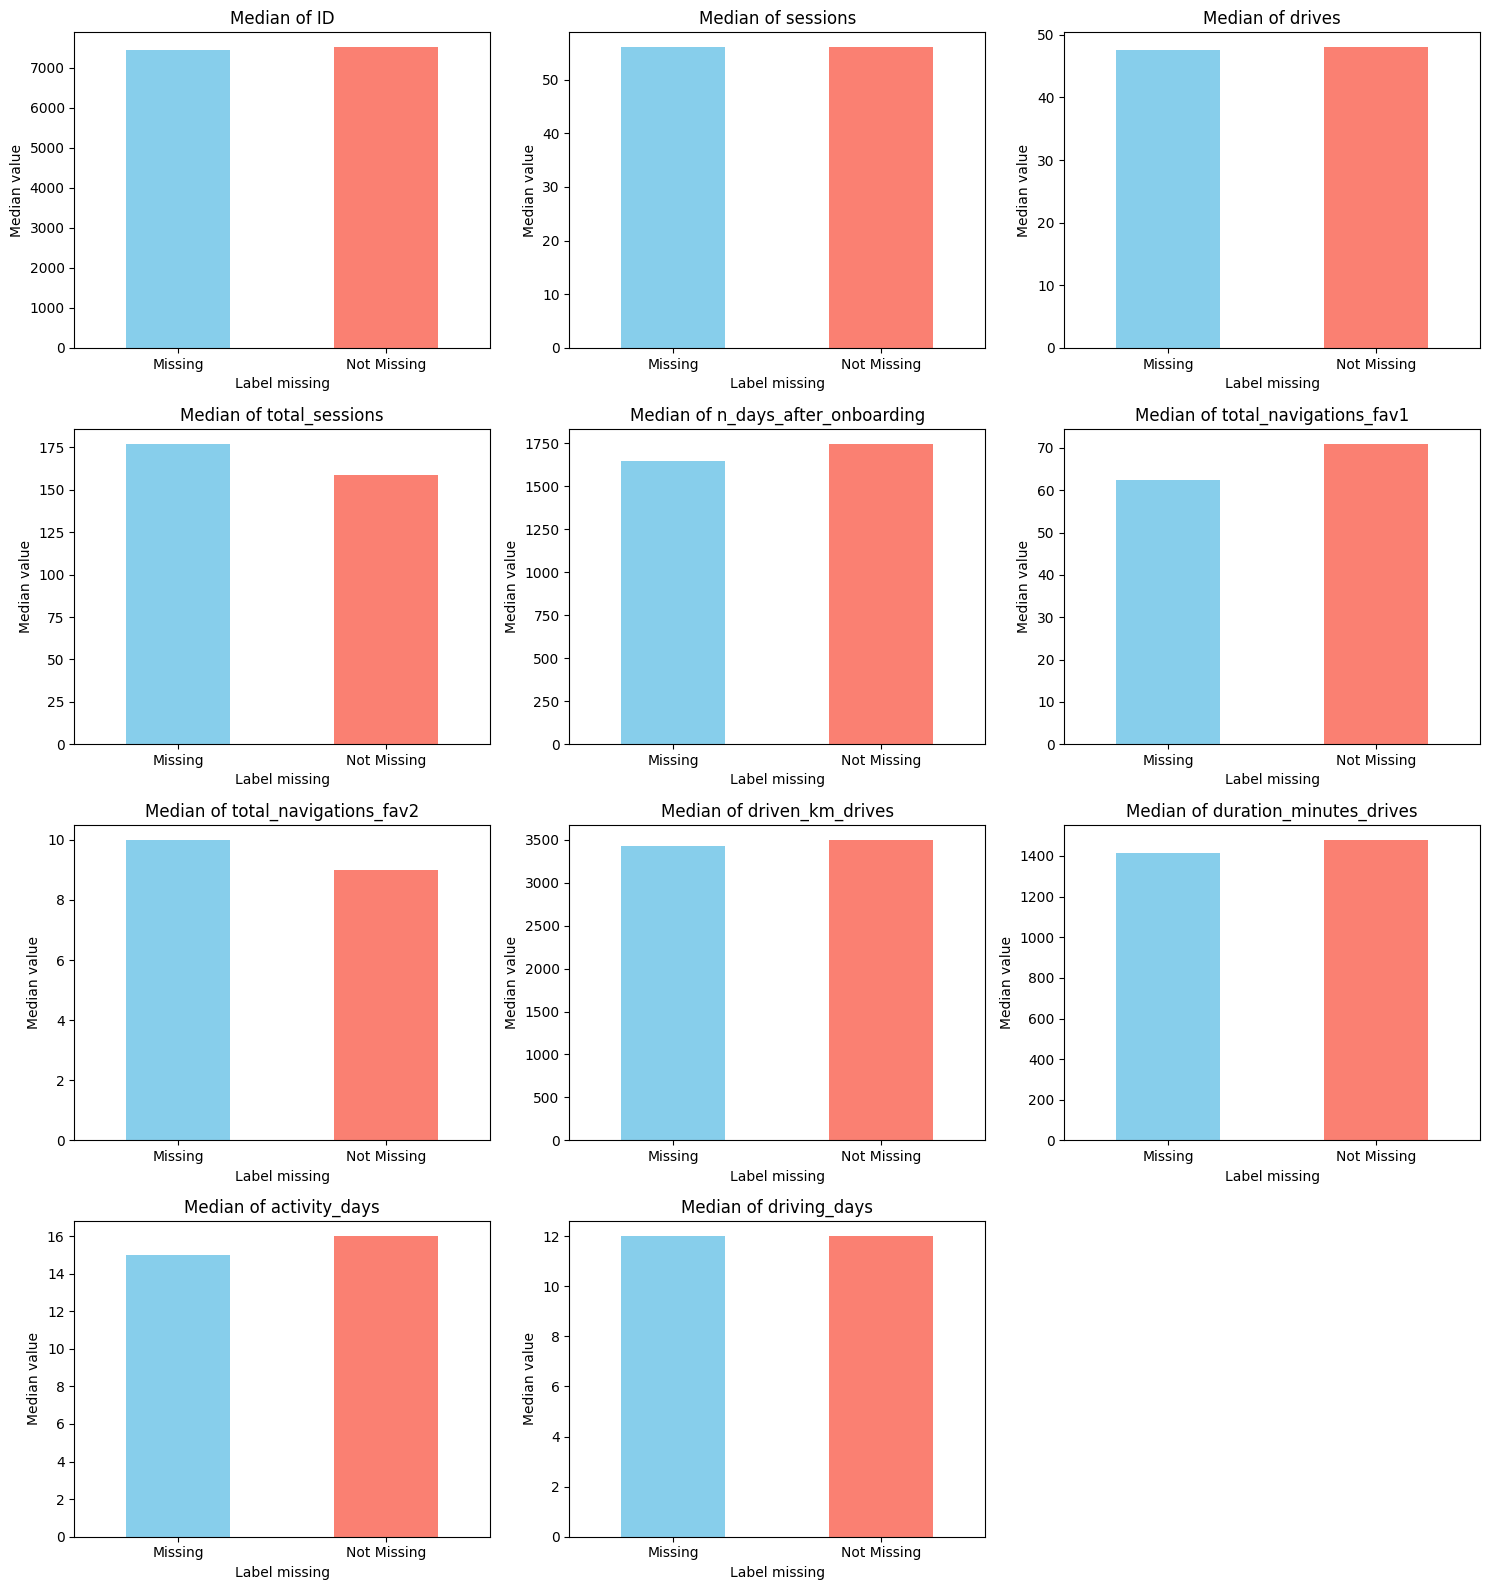

In [ ]:
df_missing=df.copy()
df_missing['label_missing'] = df_missing['label'].isnull().map({True: 'Missing', False: 'Not Missing'})
medianas = df_missing.groupby('label_missing').median(numeric_only=True)
features = medianas.columns
n_features = len(features)

# Definir número de filas y columnas para subplots
n_cols = 3
n_rows = (n_features + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*5, n_rows*4))
axes = axes.flatten()

# Graficar cada feature
for i, feature in enumerate(features):
    medianas[feature].plot(kind="bar", color=["skyblue", "salmon"], ax=axes[i])
    axes[i].set_title(f"Median of {feature}")
    axes[i].set_ylabel("Median value")
    axes[i].set_xlabel("Label missing")
    axes[i].tick_params(axis='x', rotation=0)

# Eliminar subplots vacíos si los hay
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()


The median values of numeric features are comparable between the missing-label and non-missing-label groups.

There is nothing to suggest a non-random cause of the missing data

#### **Null values - device counts**

There is a correlation betwen devices and missing data?


In [ ]:
# Get count of null values by device
null_values['device'].value_counts()

,count
device,
iPhone,447
Android,253


In [ ]:
# Calculate % of iPhone nulls and Android nulls
percent_iphone=100*(null_values['device'].value_counts()['iPhone'])/(len(null_values))
print(f'iPhone: {percent_iphone:.2f} % null values')
percent_android=100*(null_values['device'].value_counts()['Android'])/(len(null_values))
print(f'Android: {percent_android:.2f} % null values')

iPhone: 63.86 % null values
Android: 36.14 % null values


Devices for the missing values rows:

iPhone: 63.86%

Android:36.14%


How does this compare to the device ratio in the full dataset?

In [ ]:
#  % of iPhone users and Android users in full dataset
percent_iphone=100*(df['device'].value_counts()['iPhone'])/(len(df))
print(f'iPhone: {percent_iphone:.2f} % total values')
percent_android=100*(df['device'].value_counts()['Android'])/(len(df))
print(f'Android: {percent_android:.2f} % total values')

iPhone: 64.48 % total values
Android: 35.52 % total values


Devices for all the data

iPhone: 64.48 %

Android: 35.52 %


The percentage of missing values by each device is consistent with their representation in the data overall.

There is nothing to suggest a non-random cause of the missing data with respect of the devices used.

### **Class imbalnaced data set**

Examine the counts and percentages of users who churned vs. those who were retained. How many of each group are represented in the data?

In [ ]:
# Counts of churned vs. retained
df['label'].value_counts()
percent_retained=100*(df['label'].value_counts()['retained'])/((len(not_null_values)))
percent_churned=100*(df['label'].value_counts()['churned'])/((len(not_null_values)))
print(f' percent retained: {percent_retained:.2f} % \n percent churned: {percent_churned:.2f} %')
proportion_minority_data=(percent_churned/percent_retained)*100
print(f' proportion of minority data: {proportion_minority_data:.2f} %')

 percent retained: 82.26 % 
 percent churned: 17.74 %
 proportion of minority data: 21.56 %


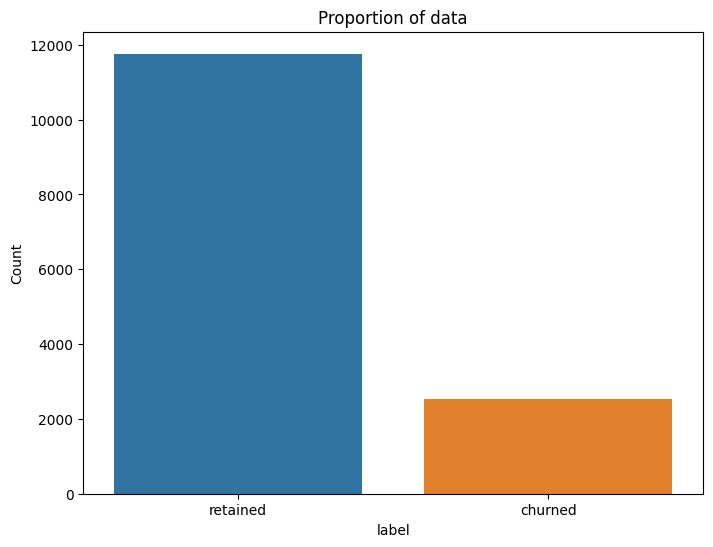

In [ ]:
#Graphic histogram of churned vs. retained
plt.figure(figsize=(8,6))
sns.countplot(x="label", data=df, hue='label',legend=False)
plt.title("Proportion of data")
plt.ylabel("Count")
plt.show()

**This dataset contains 82% retained users and 18% churned users.**

The degree of imbalanced class 21.56% is mild


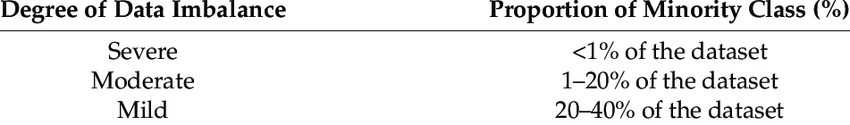

### **Median values of churned vs retained data**
The median was calculated instead of the mean to reduce the impact of outliers.

Notice, for example, that the maximum value in the `driven_km_drives` column is 21,183 km. That's more than half the circumference of the earth!

In [ ]:
# Median values of all columns for churned and retained users
df.groupby(['label']).median(numeric_only=True)


,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
label,,,,,,,,,,,
churned,7477.5,59.0,50.0,164.339042,1321.0,84.5,11.0,3652.655666,1607.183785,8.0,6.0
retained,7509.0,56.0,47.0,157.586756,1843.0,68.0,9.0,3464.684614,1458.046141,17.0,14.0


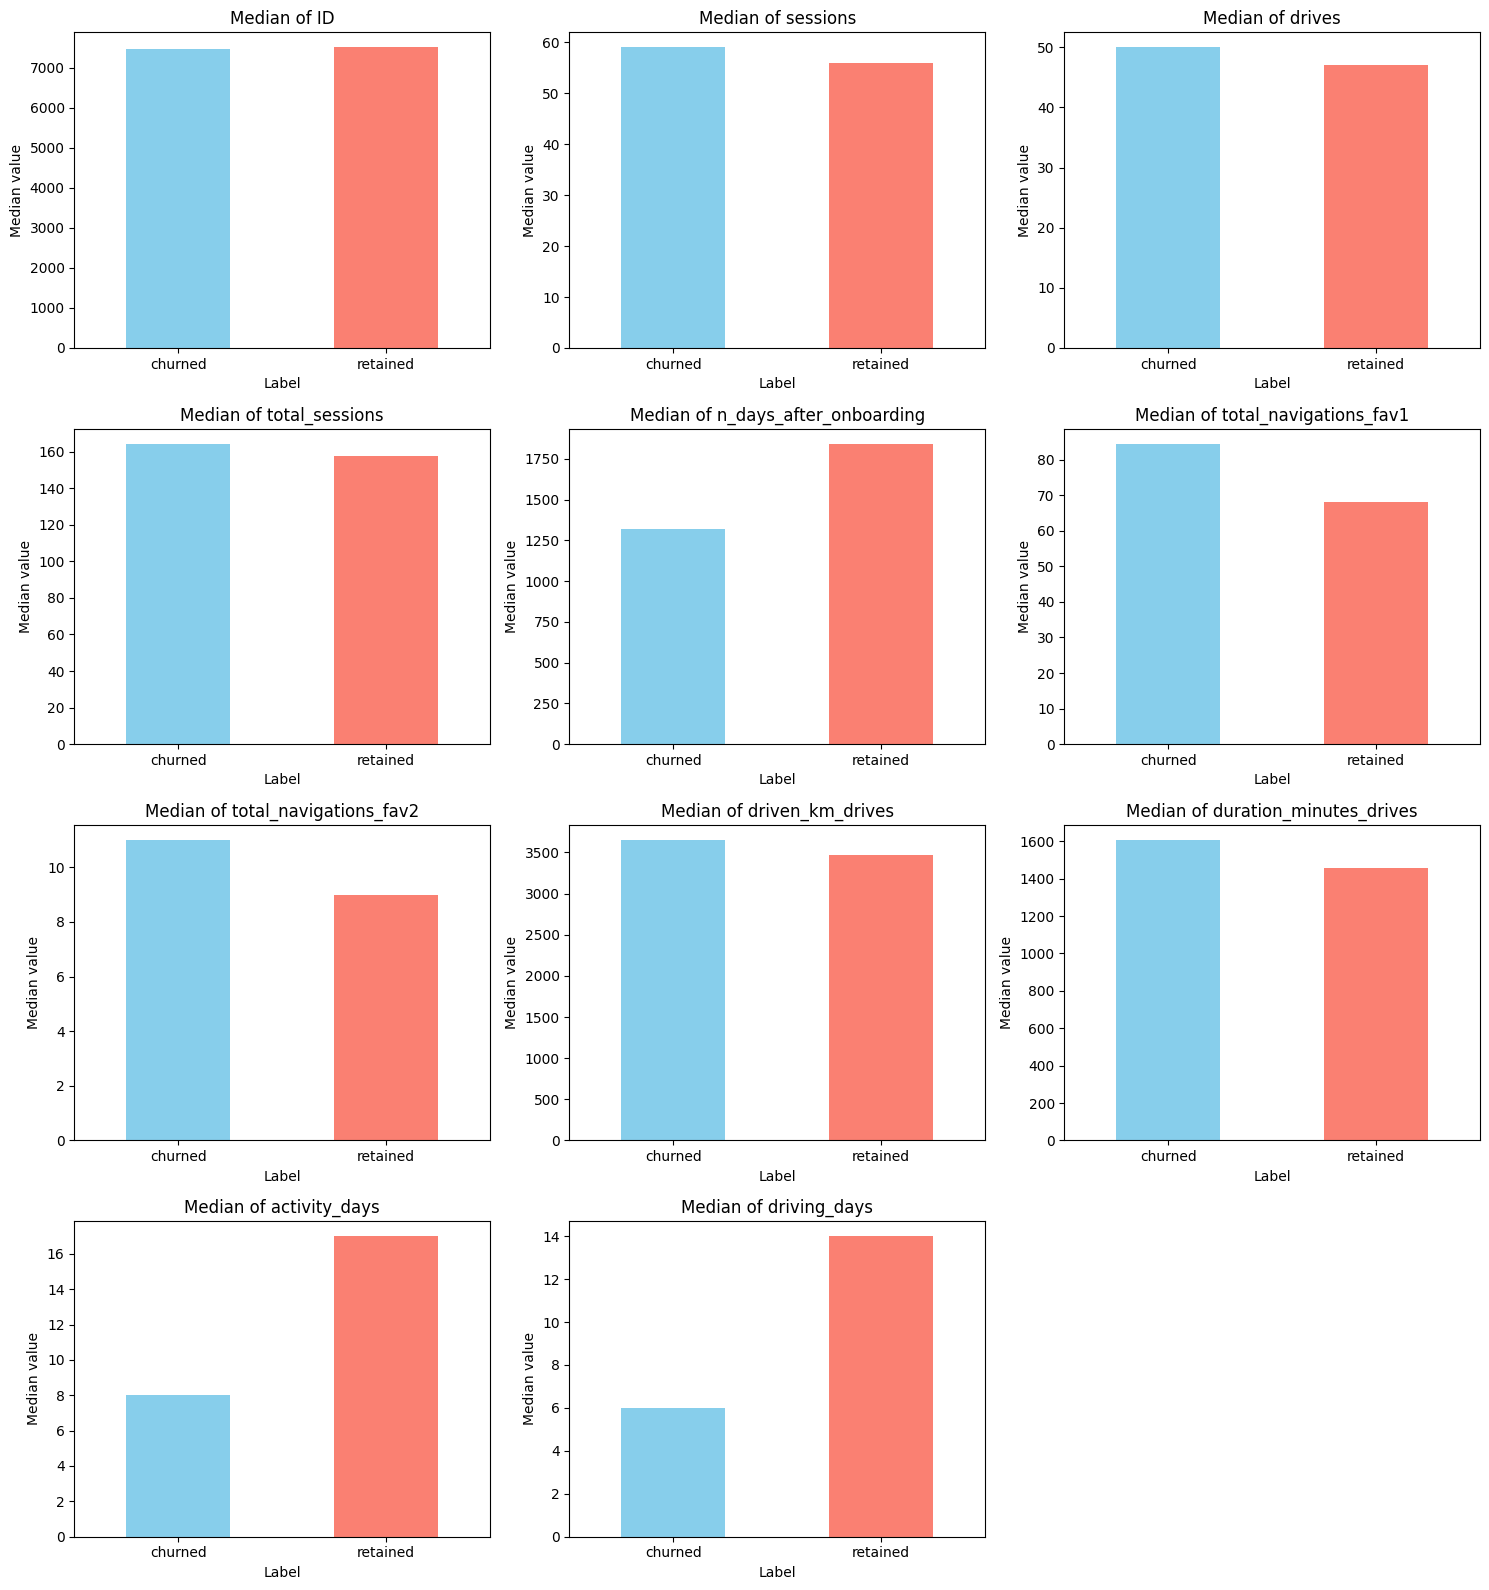

In [ ]:
medianas = df.groupby("label").median(numeric_only=True)

features = medianas.columns
n_features = len(features)

# Definir número de filas y columnas para los subplots
n_cols = 3  # puedes ajustar según cuántas columnas quieras
n_rows = (n_features + n_cols - 1) // n_cols  # ceil division

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*5, n_rows*4))
axes = axes.flatten()  # aplanar en caso de tener más de 1 fila

for i, feature in enumerate(features):
    medianas[feature].plot(kind="bar", color=["skyblue", "salmon"], ax=axes[i])
    axes[i].set_title(f"Median of {feature}")
    axes[i].set_ylabel("Median value")
    axes[i].set_xlabel("Label")
    axes[i].tick_params(axis='x', rotation=0)

# Si hay subplots vacíos, los eliminamos
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

This offers an interesting snapshot of the two groups, churned vs. retained:

Users who churned averaged ~3 more drives in the last month than retained users, but retained users used the app on over twice as many days as churned users in the same time period.

The median churned user drove ~200 more kilometers and 2.5 more hours during the last month than the median retained user.

It seems that churned users had more drives in fewer days, and their trips were farther and longer in duration. Perhaps this is suggestive of a user profile.

Calculate the median kilometers per drive in the last month for both retained and churned users.

Begin by dividing the `driven_km_drives` column by the `drives` column. Then, group the results by churned/retained and calculate the median km/drive of each group.

In [ ]:
#Km per drive
df['km_per_drive']=df['driven_km_drives']/df['drives']
df.groupby(['label'])['km_per_drive'].median()

,km_per_drive
label,
churned,74.109416
retained,75.014702


In [ ]:
df['km_per_drive'].describe()

,km_per_drive
count,1.499900e+04
mean,inf
std,NaN
min,1.008775e+00
25%,3.323065e+01
50%,7.488006e+01
75%,1.854667e+02
max,inf


In [ ]:
#In NumPy, dividing a number by zero, such as 1/0, results in infinity (inf) due to the implementation of the IEEE 754 standard
df['km_per_drive'] = df['km_per_drive'].replace(np.inf, 0)
df['km_per_drive'].describe()

,km_per_drive
count,14999.000000
mean,232.817946
std,620.622351
min,0.000000
25%,32.424301
50%,72.854343
75%,179.347527
max,15777.426560


In [ ]:
#Km per driving day
df['km_per_driving_day']=df['driven_km_drives']/df['driving_days']
df.groupby('label')['km_per_driving_day'].median()

,km_per_driving_day
label,
churned,697.541999
retained,289.549333


In [ ]:
#In NumPy, dividing a number by zero, such as 1/0, results in infinity (inf) due to the implementation of the IEEE 754 standard
df['km_per_driving_day'].describe()

,km_per_driving_day
count,1.499900e+04
mean,inf
std,NaN
min,3.022063e+00
25%,1.672804e+02
50%,3.231459e+02
75%,7.579257e+02
max,inf


In [ ]:
# 1. Convert infinite values to zero
#In NumPy, dividing a number by zero, such as 1/0, results in infinity (inf) due to the implementation of the IEEE 754 standard
df['km_per_driving_day'] = df['km_per_driving_day'].replace(np.inf, 0)
df['km_per_driving_day'].describe()

,km_per_driving_day
count,14999.000000
mean,578.963113
std,1030.094384
min,0.000000
25%,136.238895
50%,272.889272
75%,558.686918
max,15420.234110


Median number of drives per driving day for each group.

In [ ]:
# Drives per driving day
df['drives_per_driving_day']=df['drives']/df['driving_days']
df.groupby(['label'])['drives_per_driving_day'].median()

,drives_per_driving_day
label,
churned,10.0000
retained,4.0625


In [ ]:
#Drives per driving day
#In NumPy, dividing a number by zero, such as 1/0, results in infinity (inf) due to the implementation of the IEEE 754 standard
df['drives_per_driving_day'].describe()

,drives_per_driving_day
count,1.499200e+04
mean,inf
std,NaN
min,0.000000e+00
25%,1.800000e+00
50%,4.666667e+00
75%,1.216667e+01
max,inf


In [ ]:
#replace of np.inf to 0
df['drives_per_driving_day'] = df['drives_per_driving_day'].replace(np.inf, 0)
df['drives_per_driving_day'].describe()

,drives_per_driving_day
count,14992.000000
mean,9.387368
std,19.826097
min,0.000000
25%,1.250000
50%,3.666667
75%,9.000000
max,395.000000


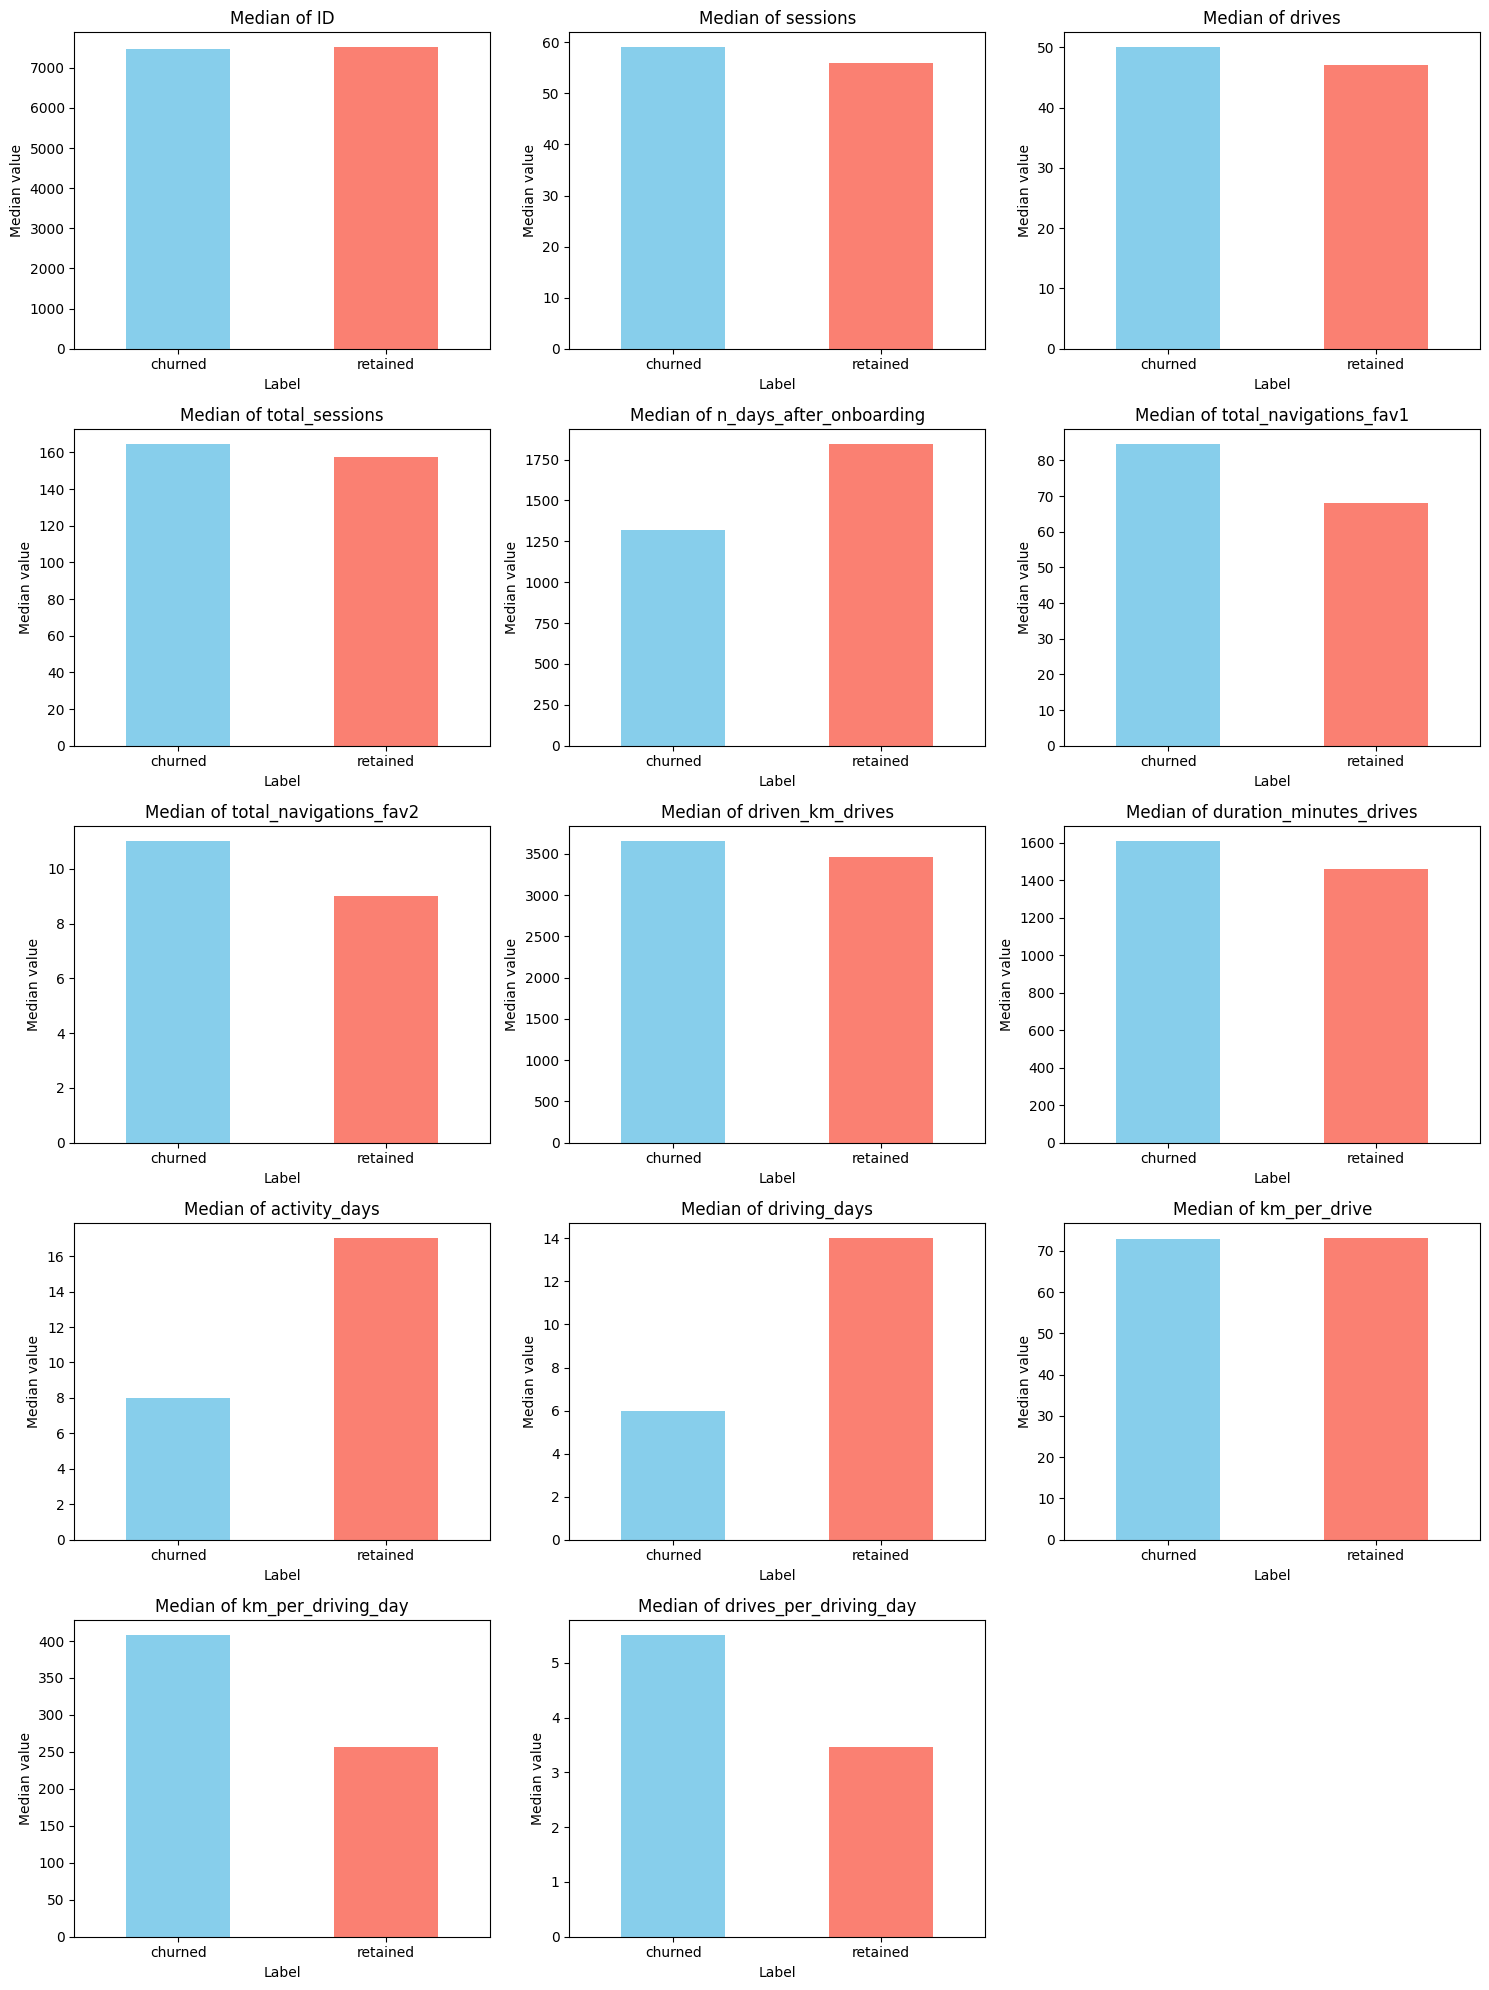

In [ ]:
medianas = df.groupby("label").median(numeric_only=True)

features = medianas.columns
n_features = len(features)

# Definir número de filas y columnas para los subplots
n_cols = 3  # puedes ajustar según cuántas columnas quieras
n_rows = (n_features + n_cols - 1) // n_cols  # ceil division

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*5, n_rows*4))
axes = axes.flatten()  # aplanar en caso de tener más de 1 fila

for i, feature in enumerate(features):
    medianas[feature].plot(kind="bar", color=["skyblue", "salmon"], ax=axes[i])
    axes[i].set_title(f"Median of {feature}")
    axes[i].set_ylabel("Median value")
    axes[i].set_xlabel("Label")
    axes[i].tick_params(axis='x', rotation=0)

# Si hay subplots vacíos, los eliminamos
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

The median user who churned drove 698 kilometers each day they drove last month, which is almost ~240% the per-drive-day distance of retained users. The median churned user had a similarly disproporionate number of drives per drive day compared to retained users.

It is clear from these figures that, regardless of whether a user churned or not, the users represented in this data are serious drivers! It would probably be safe to assume that this data does not represent typical drivers at large. Perhaps the data&mdash;and in particular the sample of churned users&mdash;contains a high proportion of long-haul truckers.

In consideration of how much these users drive, it would be worthwhile to recommend to Waze that they gather more data on these super-drivers. It's possible that the reason for their driving so much is also the reason why the Waze app does not meet their specific set of needs, which may differ from the needs of a more typical driver, such as a commuter.

The ratio of iPhone users and Android users is consistent between the churned group and the retained group, and those ratios are both consistent with the ratio found in the overall dataset.

#### **Devices vs churned or retained**
There is a correlation betwen devices and missing data?

In [ ]:
#Device and Churned or Retained
df.groupby('label')['device'].value_counts(normalize=True)

label     device 
churned   iPhone     0.648659
          Android    0.351341
retained  iPhone     0.644393
          Android    0.355607
Name: proportion, dtype: float64

Also, the ratio of iPhone users and Android users is consistent between the churned group and the retained group, and those ratios are both consistent with the ratio found in the overall dataset.

### **Delete Missing Data**
There is nothing to suggest a non-random cause of the missing data, so we can delete rows with missing data



In [ ]:
df.dropna(inplace=True)
print(f'Shape: {df.shape}')
df.isnull().sum()


Shape: (14292, 16)


,0
ID,0
label,0
sessions,0
drives,0
total_sessions,0
n_days_after_onboarding,0
total_navigations_fav1,0
total_navigations_fav2,0
driven_km_drives,0
duration_minutes_drives,0


#**Data Visualization**

###**Outliers and distribution**

In [ ]:

def plot_box_hist(df, columns, bins=30):

    for col in columns:
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))

        # Boxplot
        sns.boxplot(y=df[col], color="#04D8B2", ax=axes[0])
        axes[0].set_title(f"Boxplot of {col}")
        axes[0].set_ylabel(col)

        # Histograma
        axes[1].hist(df[col], bins=bins, color="skyblue", edgecolor="black")
        axes[1].set_title(f"Histogram of {col}")
        axes[1].set_xlabel(col)
        axes[1].set_ylabel("Frequency")

        plt.suptitle(f"Distribution of {col}", fontsize=14)
        plt.tight_layout()
        plt.show()

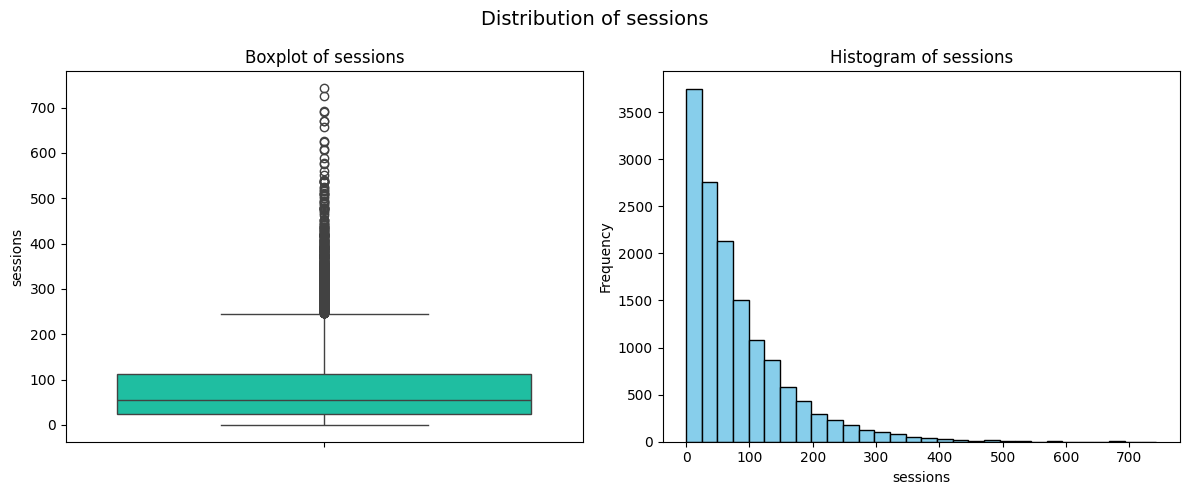

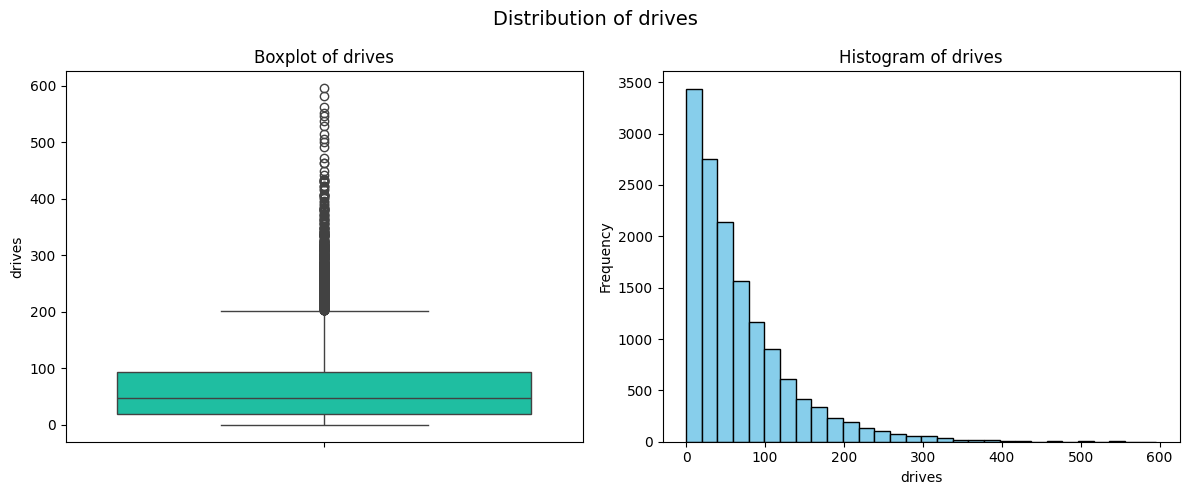

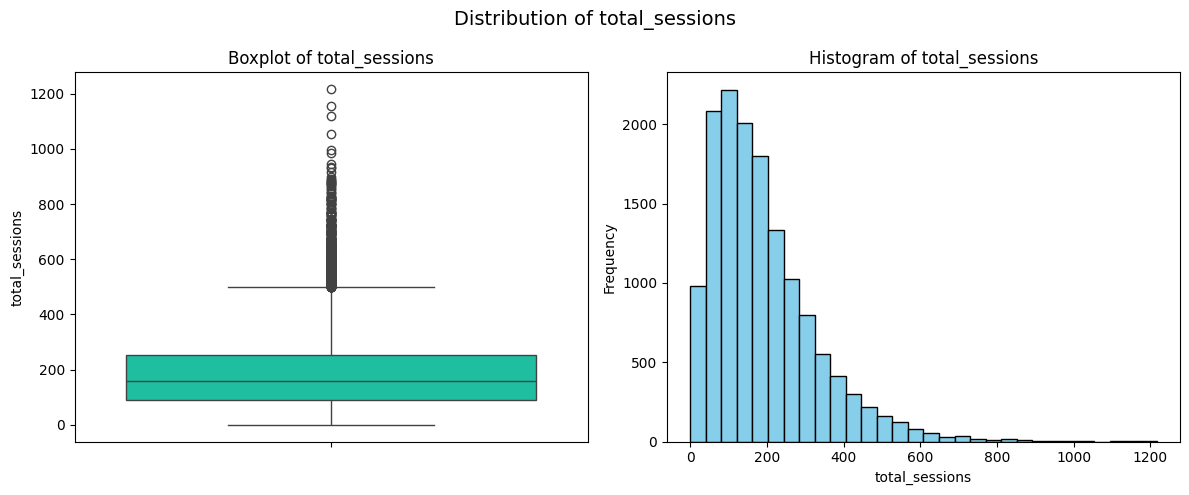

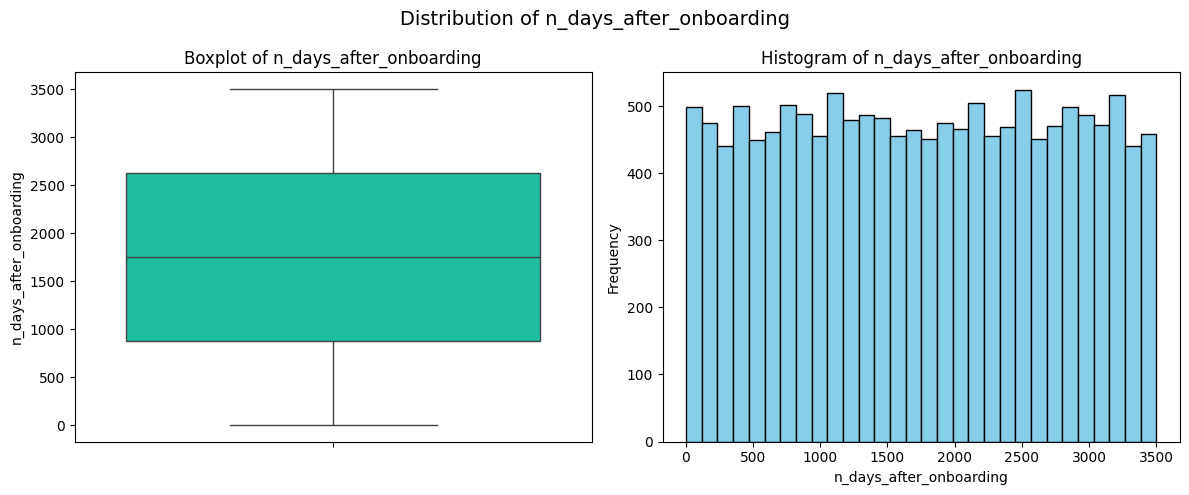

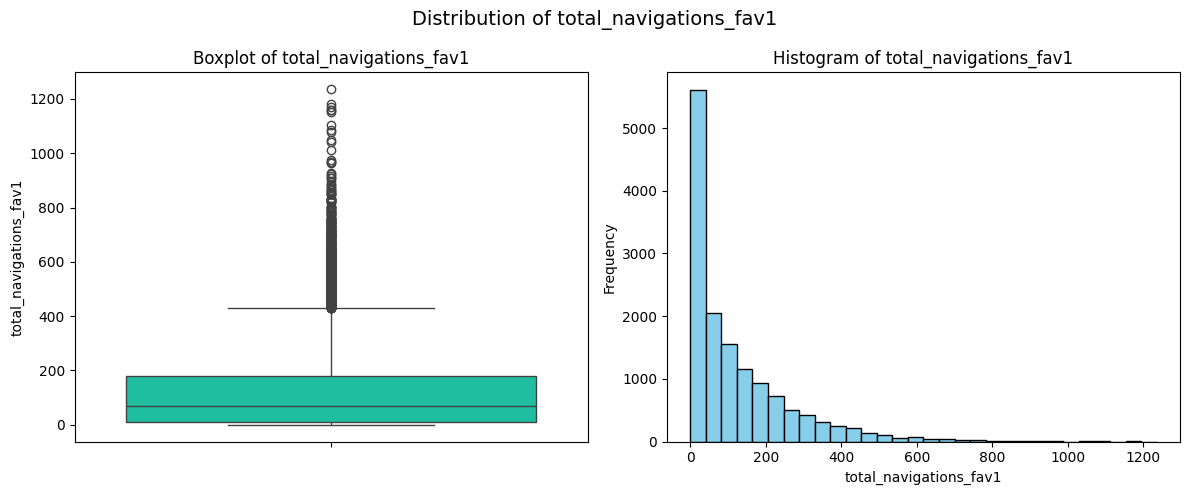

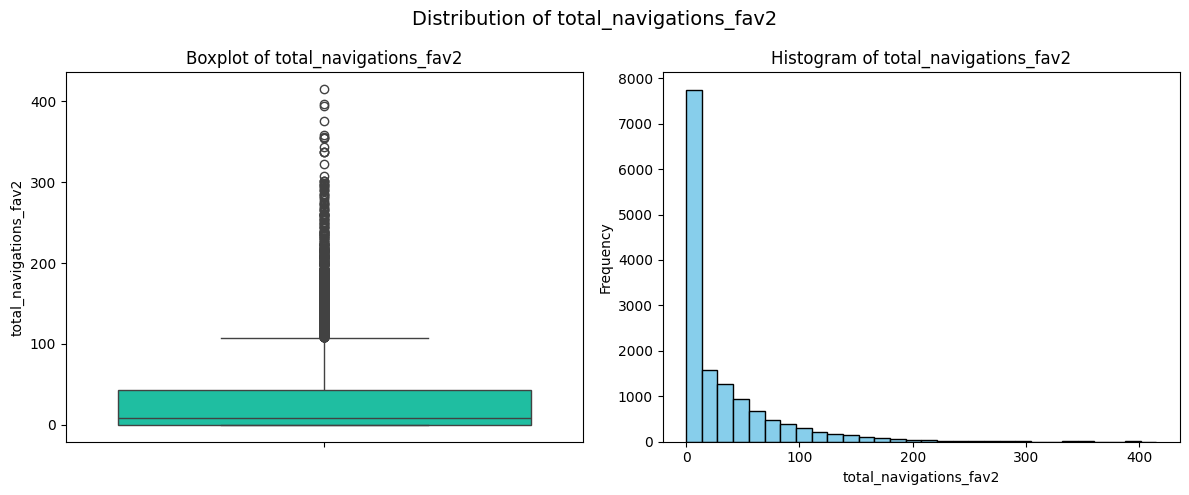

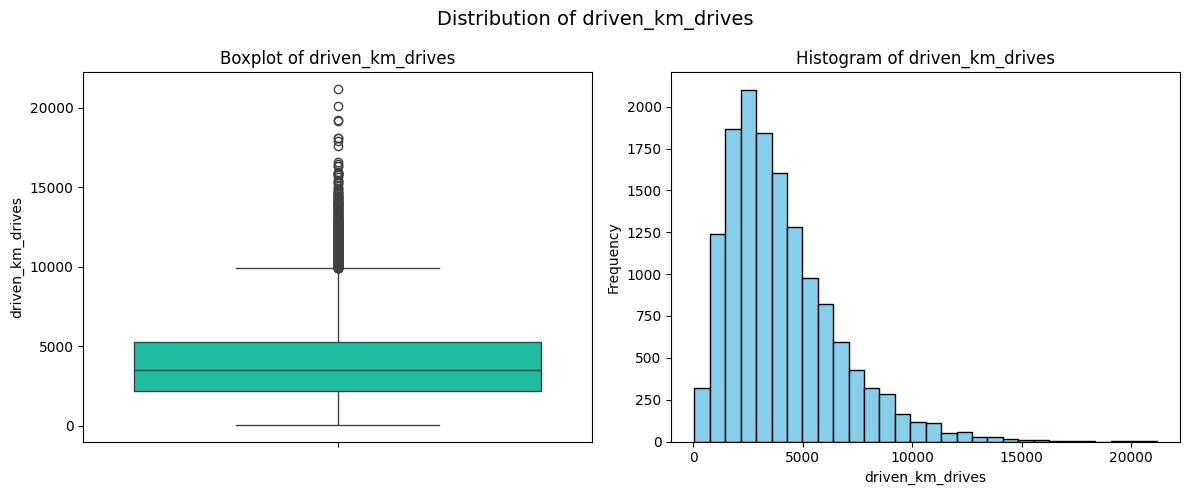

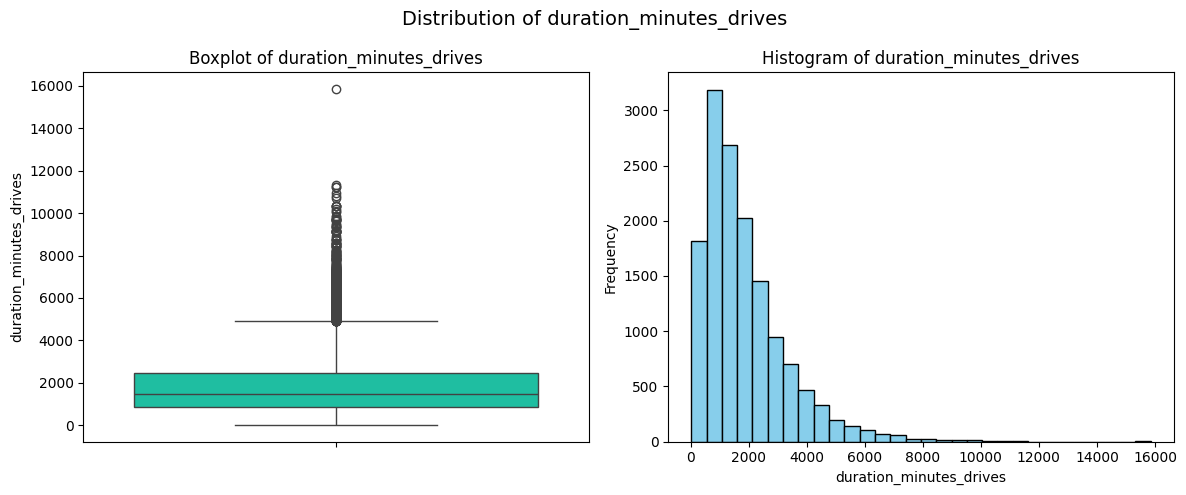

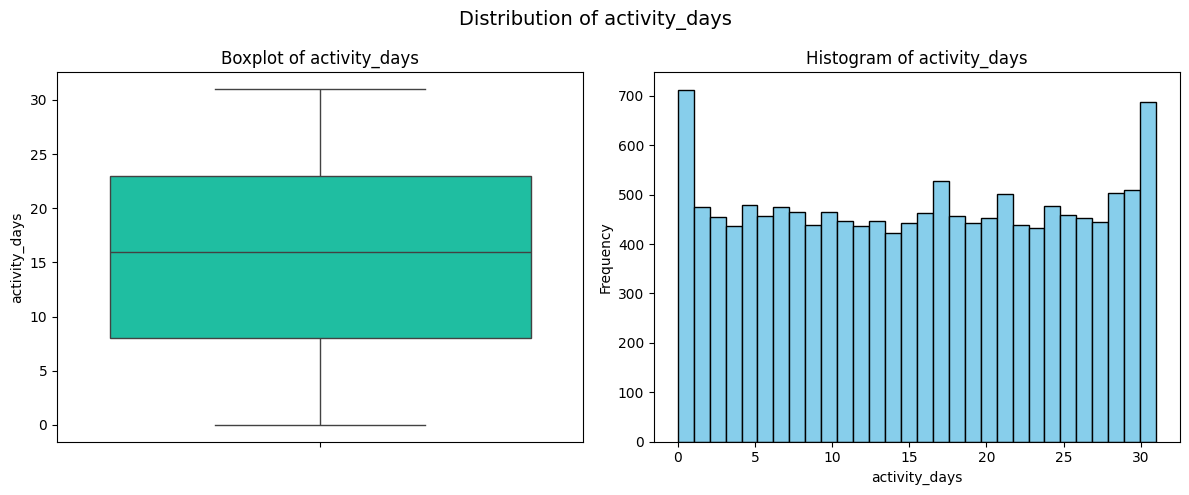

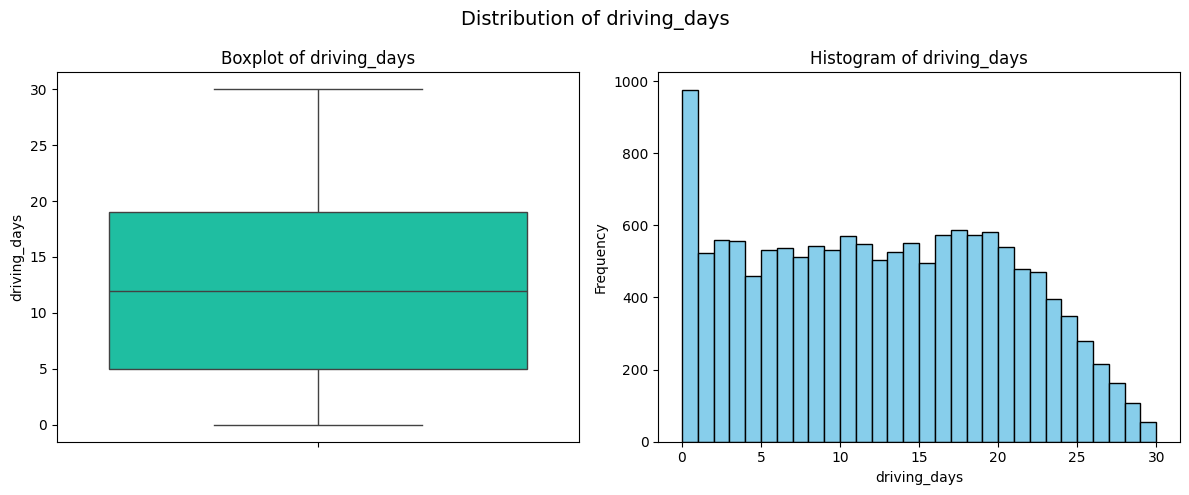

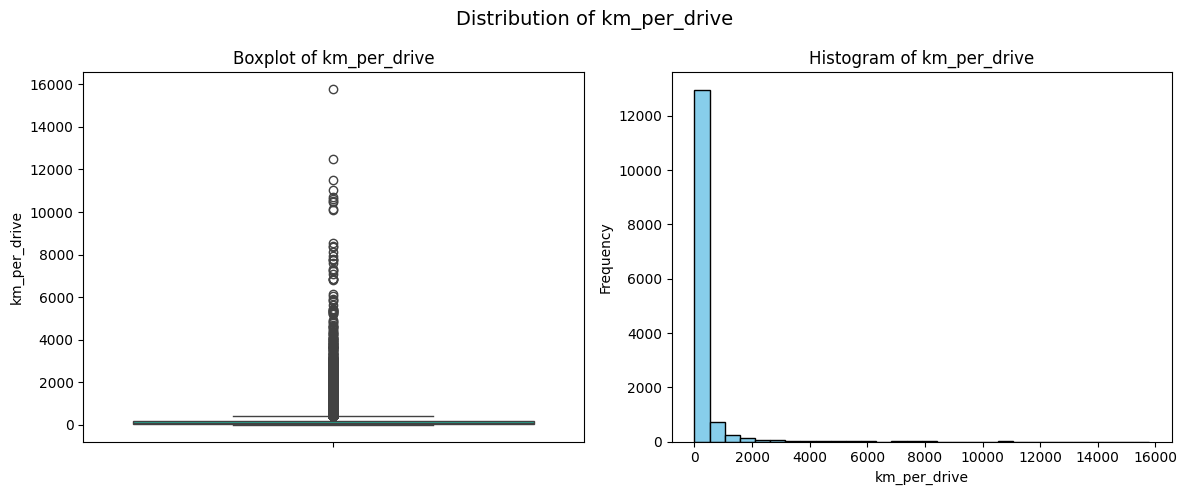

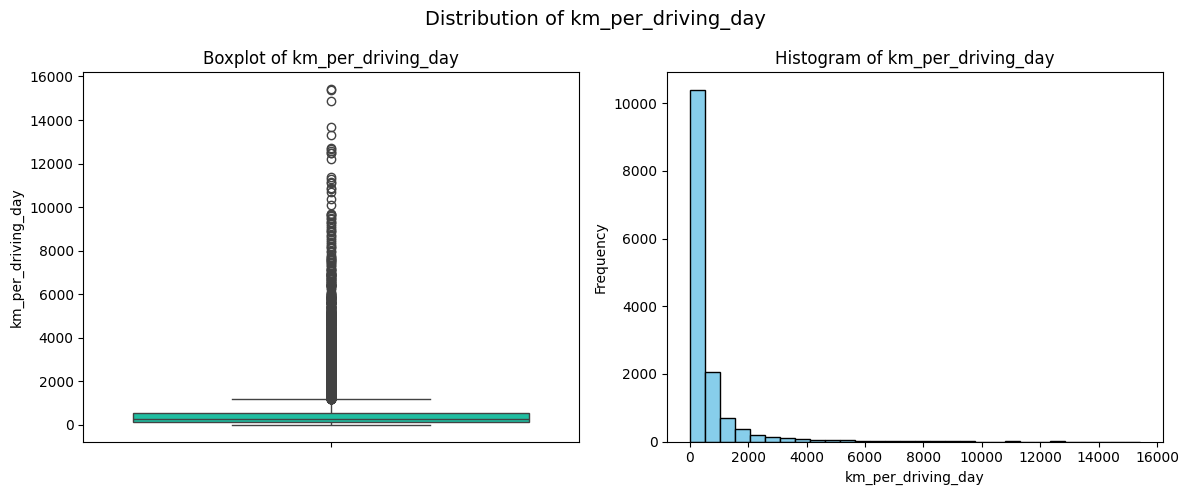

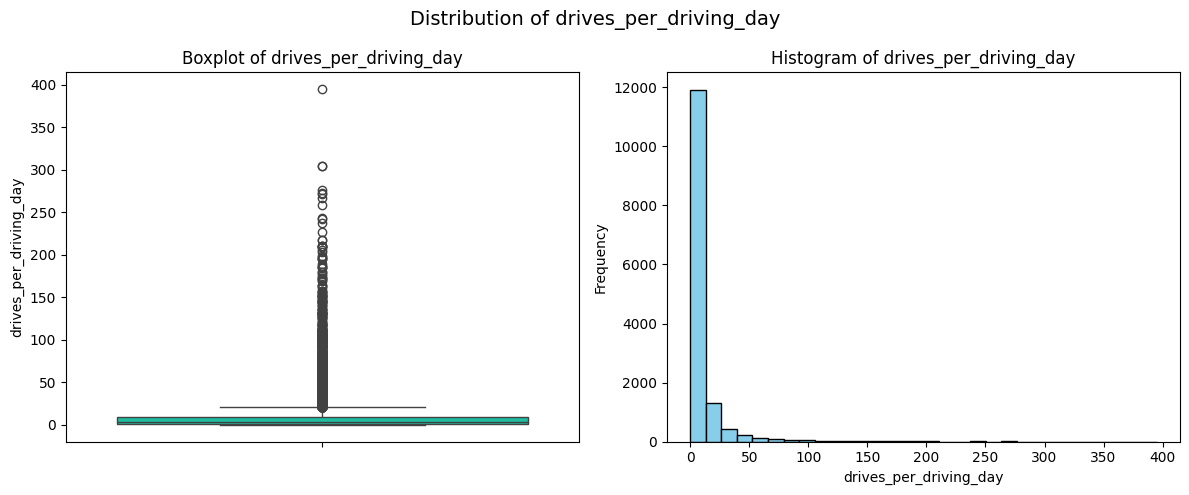

In [ ]:
features = df.select_dtypes(include="number").columns
features = [col for col in features if col not in 'ID']
plot_box_hist(df,features)

* The **sessions** variable is a right-skewed distribution with half of the observations having 56 or fewer sessions. However, as indicated by the boxplot, some users have more than 700. Remember Session variable is the number of times a user opened the app during the month.
* The **drives** variable follows a distribution similar to the sessions variable. It is right-skewed, approximately log-normal, with a median of 48. However, some drivers had over 400 drives in the last month.Remember Drives variables is an occurrence of driving at least 1 km during the month.
* The **total sessions** variable is a right-skewed distribution. The median total number of sessions is 159.6. This is interesting information because, if the median number of sessions in the last month was 48 and the median total sessions was ~160, then it seems that a large proportion of a user's total drives might have taken place in the last month.
* The total user tenure (i.e., **number of days since onboarding**) is a uniform distribution with values ranging from near-zero to ~ 3,500 (~ 9.5 years).

* The **driven Km drives** variable is a right-skewed distribution with half the users driving under 3,495 kilometers.  The users in this dataset drive a lot. The longest distance driven in the month (21183 km) was over half the circumferene of the earth (40075 km). Remember driven Km drives is the total kilometers driven during the month.

* The **duration_minutes_drives** variable has a heavily skewed right tail. Half of the users drove less than ~ 1,478 minutes (~ 25 hours), but some users clocked over 250 hours over the month. Remember the variable is the Total driving duration in minutes during the month.

* Within the last month, **users opened the app** a median of 16 times. The box plot reveals a centered distribution. The histogram shows a nearly uniform distribution of ~500 people opening the app on each count of days. However, there are ~7000 people who didn't open the app at all and ~700 people who opened the app every day of the month.

* The **number of days users drove each month** is almost uniform, and it largely correlates with the number of days they opened the app that month, except the driving_days distribution tails off on the right.
* The **kilometers per drive** variable exhibits a heavily right-skewed distribution. Most users drove fewer than 500 km per drive, but outliers include users driving up to 16,000 km per drive.

* Similarly, the **kilometers per driving day** variable is heavily right-skewed. Most users accumulated fewer than 500 km per day, while outliers reached up to 16,000 km per day.

* **The number of drives per day** also shows a strongly right-skewed distribution. Most users completed fewer than 15 drives per day, whereas outliers recorded more than 400 drives per day.

###**Churned label**

The maximum value is 15,420 kilometers per drive day. This is physically impossible. Driving 100 km/hour for 12 hours is 1,200 km. It's unlikely many people averaged more than this each day they drove, so, for now, disregard rows where the distance in this column is greater than 1,200 km.

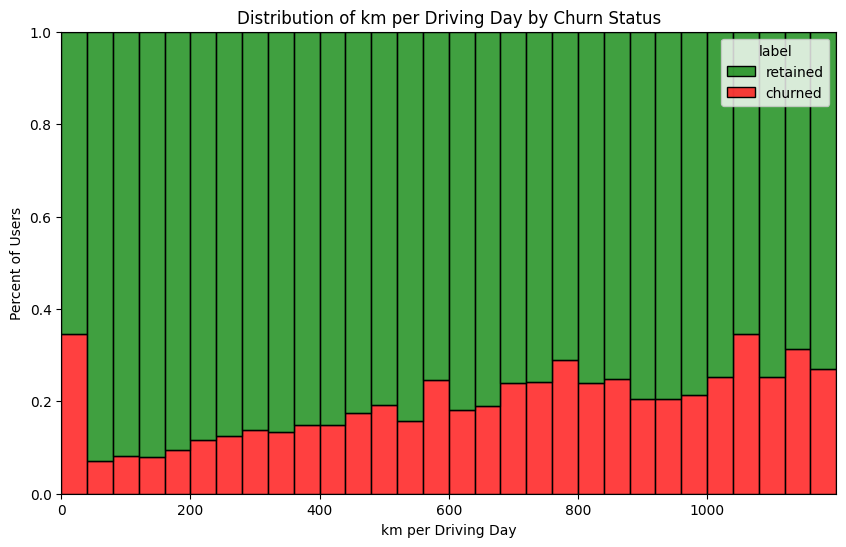

In [ ]:
#mask
df_mask=df[df['km_per_driving_day']<=1200]


# Histogram
plt.figure(figsize=(10,6))

sns.histplot(
    data=df_mask,
    x="km_per_driving_day",
    hue="label",        # churned vs retained
    multiple="fill",    # stack bars as percentages
    bins=30,            # number of bins (bars)
    palette=["green", "red"]  # colors for churned and retained
)

plt.title("Distribution of km per Driving Day by Churn Status")
plt.xlabel("km per Driving Day")
plt.ylabel("Percent of Users")
plt.show()

The churn rate tends to increase as the mean daily distance driven increases. It would be worth investigating further the reasons for long-distance users to discontinue using the app

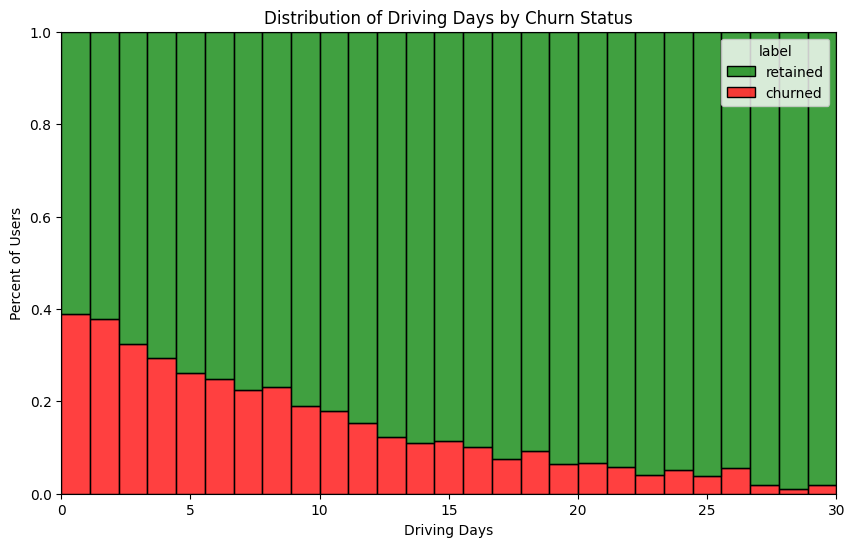

In [ ]:
#Churned vs driving days
# Histogram
plt.figure(figsize=(10,6))

sns.histplot(
    data=df,
    x="driving_days",
    hue="label",        # churned vs retained
    multiple="fill",    # stack bars as percentages
    palette=["green", "red"]  # colors for churned and retained
)

plt.title("Distribution of Driving Days by Churn Status")
plt.xlabel("Driving Days")
plt.ylabel("Percent of Users")
plt.show()



The churn rate is highest for people who didn't use Waze much during the last month. The more times they used the app, the less likely they were to churn. While 40% of the users who didn't use the app at all last month churned,



###**Monthly Sessions (% of Total)**

In [ ]:
df['percent_sessions_in_last_month']=(df['sessions']/df['total_sessions'])*100
df['percent_sessions_in_last_month'].describe()

,percent_sessions_in_last_month
count,14292.000000
mean,45.005701
std,28.676036
min,0.000000
25%,19.750598
50%,42.464347
75%,68.734193
max,153.063707


In [ ]:
median_percent_sessions= df['percent_sessions_in_last_month'].median()
print(f'Monthly Sessions % of total: {median_percent_sessions:.2f} %')

Monthly Sessions % of total: 42.46 %


Some records show more monthly sessions than the total, indicating data entry errors.

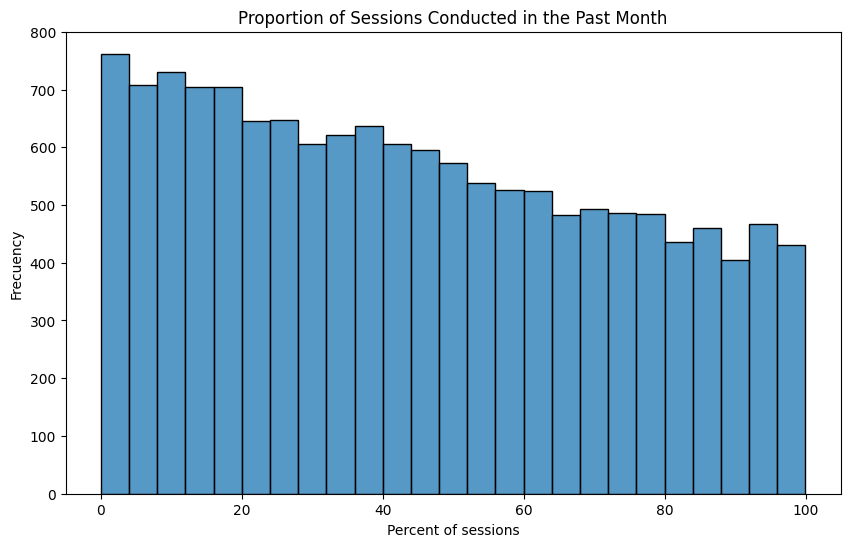

In [ ]:
# Histogram
df_mask=df[df['percent_sessions_in_last_month']<=100]
plt.figure(figsize=(10,6))

sns.histplot(
    data=df_mask,
    x='percent_sessions_in_last_month'

)

plt.title("Proportion of Sessions Conducted in the Past Month")
plt.xlabel("Percent of sessions")
plt.ylabel("Frecuency")
plt.show()

In [ ]:
#Elimination of possible data entry errors
df=df[df['percent_sessions_in_last_month']<=100]
df['percent_sessions_in_last_month'].describe()

,percent_sessions_in_last_month
count,14274.000000
mean,44.931926
std,28.615489
min,0.000000
25%,19.700605
50%,42.357141
75%,68.636158
max,99.977369


#**Classification methods without outliers effects**


##**XGBoost**

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.model_selection import GridSearchCV

In [ ]:
df['label_num'] = df['label'].map({'retained': 0, 'churned': 1})
X = df.drop(columns=['ID', 'label','device', 'label_num'])
y=df['label_num']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

In [ ]:
X.head()

,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,km_per_drive,km_per_driving_day,drives_per_driving_day,percent_sessions_in_last_month
0,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,11.632058,138.360267,11.894737,95.367025
1,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,128.186173,1246.901868,9.727273,40.685648
2,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,32.201567,382.393602,11.875000,84.118609
3,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,22.839778,304.530374,13.333333,72.496767
4,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,58.091206,219.455667,3.777778,49.926590


In [ ]:
# Definir modelo
xgb = XGBClassifier(
    objective="binary:logistic",
    eval_metric="auc",
    use_label_encoder=False,
    random_state=0
)

# Hiperparámetros a optimizar

param_grid = {
    "n_estimators": [300, 500],
    "max_depth": [2, 3, 5],
    "learning_rate": [0.4, 0.5],
    "subsample": [0.5, 0.6],
    "colsample_bytree": [0.6, 0.8]
}

In [ ]:
grid_xgb = GridSearchCV(xgb, param_grid, cv=3, scoring="recall", n_jobs=-1)
grid_xgb.fit(X_train, y_train)

best_xgb = grid_xgb.best_estimator_
y_pred_xgb  = best_xgb.predict(X_test)
y_proba_xgb = best_xgb.predict_proba(X_test)[:, 1]#el cálculo de la probabilidad de la clase 1 Calcular métricas como ROC AUC

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [13:50:27] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [ ]:
print("Mejores hiperparámetros:", grid_xgb.best_params_)

# Evaluación
print("Accuracy :", accuracy_score(y_test, y_pred_xgb))
print("Recall   :", recall_score(y_test, y_pred_xgb))
print("F1-score :", f1_score(y_test, y_pred_xgb))
print("ROC AUC  :", roc_auc_score(y_test, y_proba_xgb))

Mejores hiperparámetros: {'colsample_bytree': 0.6, 'learning_rate': 0.5, 'max_depth': 3, 'n_estimators': 500, 'subsample': 0.5}
Accuracy : 0.7800350262697022
Recall   : 0.22332015810276679
F1-score : 0.2646370023419204
ROC AUC  : 0.6569593990883346


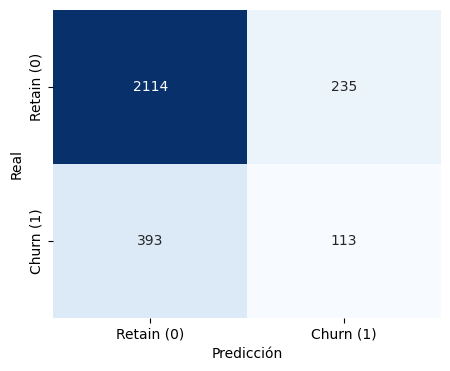

In [ ]:
cm = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=["Retain (0)", "Churn (1)"],
    yticklabels=["Retain (0)", "Churn (1)"]
)
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

Low Recall with ~80% Accuracy: the model predicts the majority class well but misses many cases from the minority class

##**Randome Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=0)
param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [5, 10, None],
    "max_features": ["sqrt", "log2"],
    "min_samples_split": [2, 5, 10]
}

In [ ]:
grid_rf = GridSearchCV(rf, param_grid, cv=3, scoring="recall", n_jobs=-1)
grid_rf.fit(X_train, y_train)

best_rf = grid_rf.best_estimator_
y_pred_rf  = best_rf.predict(X_test)
y_proba_rf = best_rf.predict_proba(X_test)[:, 1]

In [ ]:
print("Mejores hiperparámetros:", grid_rf.best_params_)

# Evaluación
print("Accuracy :", accuracy_score(y_test, y_pred_rf))
print("Recall   :", recall_score(y_test, y_pred_rf))
print("F1-score :", f1_score(y_test, y_pred_rf))
print("ROC AUC  :", roc_auc_score(y_test, y_proba_rf))

Mejores hiperparámetros: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_split': 5, 'n_estimators': 100}
Accuracy : 0.8122591943957969
Recall   : 0.09288537549407115
F1-score : 0.1492063492063492
ROC AUC  : 0.7099808681517827


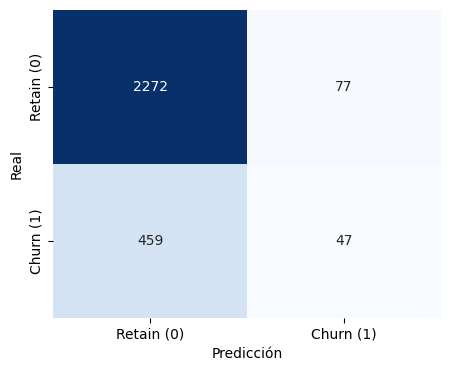

In [ ]:
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=["Retain (0)", "Churn (1)"],
    yticklabels=["Retain (0)", "Churn (1)"]
)
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

##**Balanced Randome Forest**

In [ ]:
from imblearn.ensemble import BalancedRandomForestClassifier

brf = BalancedRandomForestClassifier(random_state=42)
param_grid = {
    "n_estimators": [ 300, 400,500],
    "max_depth": [5, None],
    "min_samples_leaf": [1, 2],
    "max_features": ["sqrt"],
    "sampling_strategy": ["auto"]
}

In [ ]:
grid_brf = GridSearchCV(brf, param_grid, cv=3, scoring="recall", n_jobs=-1)
grid_brf.fit(X_train, y_train)

best_brf = grid_brf.best_estimator_
y_pred_brf  = best_brf.predict(X_test)
y_proba_brf = best_brf.predict_proba(X_test)[:, 1]

In [ ]:
print("Mejores hiperparámetros:", grid_brf.best_params_)

# Evaluación
print("Accuracy :", accuracy_score(y_test, y_pred_brf))
print("Recall   :", recall_score(y_test, y_pred_brf))
print("F1-score :", f1_score(y_test, y_pred_brf))
print("ROC AUC  :", roc_auc_score(y_test, y_proba_brf))

Mejores hiperparámetros: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 500, 'sampling_strategy': 'auto'}
Accuracy : 0.6367775831873905
Recall   : 0.7213438735177866
F1-score : 0.41312959818902095
ROC AUC  : 0.7206089716084718


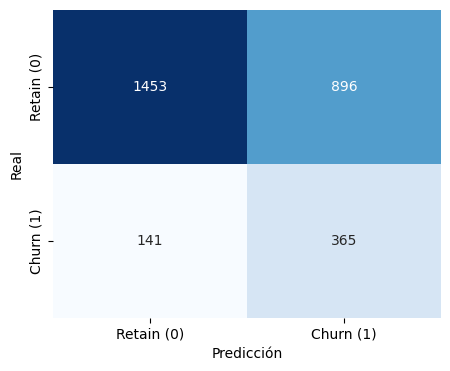

In [ ]:
cm = confusion_matrix(y_test, y_pred_brf)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=["Retain (0)", "Churn (1)"],
    yticklabels=["Retain (0)", "Churn (1)"]
)
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

##**Method Resume**
| Modelo                   | Accuracy | Recall | F1-score | ROC AUC |
|---------------------------|----------|--------|----------|---------|
| XGBoost                  | 0.78     | 0.22   | 0.26     | 0.66    |
| Random Forest            | 0.81     | 0.09   | 0.15     | 0.71    |
| Balanced Random Forest   | 0.64     | 0.72   | 0.41     | 0.72    |



* The Balanced Random Forest model improves recall and F1-score, although it presents a lower accuracy compared to Random Forest and XGBoost. Given the priority of identifying churned users, the Balanced Random Forest offers superior effectiveness for this task.

* If stakeholders are aiming for a balanced approach, or if the cost of false positives is particularly high, XGBoost may be the preferred choice.

shap_values.shape: (2855, 14, 2)
shap_class1.shape: (2855, 14)


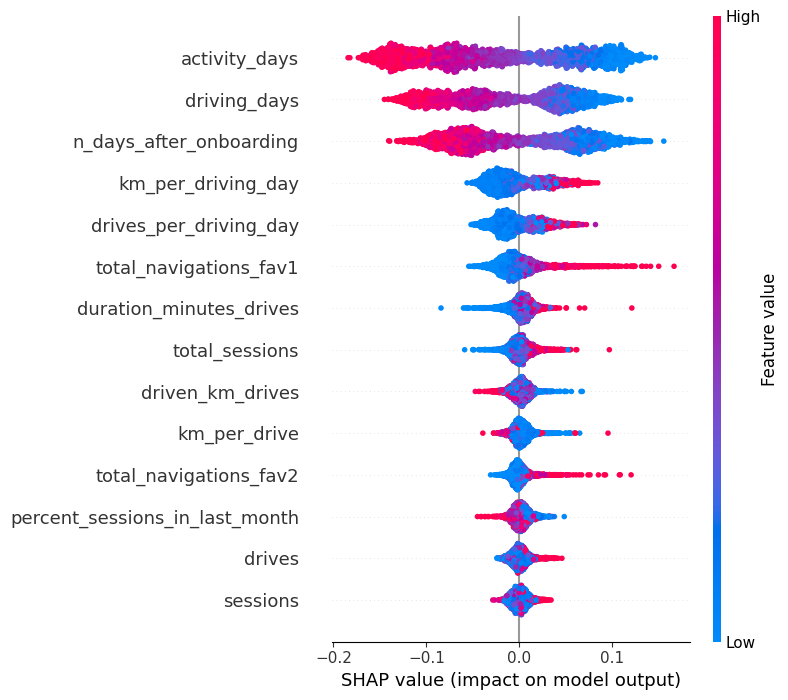

In [ ]:
import shap

# Calculamos shap values
explainer = shap.TreeExplainer(best_brf)
shap_values = explainer.shap_values(X_test)

# Si es binaria → shap_values es de forma (n_muestras, n_features, 2)
print("shap_values.shape:", np.array(shap_values).shape)

# Nos quedamos con la clase positiva (1)
shap_class1 = shap_values[:, :, 1]

# Ahora ya está alineado con X_test
print("shap_class1.shape:", shap_class1.shape)  # (2855, 14)

# Gráfico summary
shap.summary_plot(shap_class1, X_test)

**Faltante**

* Hacer un grid mejor para cada método, por el tiempo de calculo

* hacer un ajuste de hiperparámetros por una busqueda bayesiana